# Ignore Warnings

In [1]:
import warnings
warnings.simplefilter("ignore")

# Importing packages and loading data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from thefuzz import process
from dataprep.clean import clean_country
import calendar
from pywaffle import Waffle

sns.set_palette('deep')

In [3]:
df = pd.read_csv("D:\SelfStudy\DataScience\DataSets\HotelBooking\hotel_bookings.csv")

# Data Informations 

In [4]:
df.shape

(119390, 32)

In [5]:
pd.set_option("display.max_columns", None)

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.isna().sum()/len(df)

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

In [9]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
df.duplicated().sum()

31994

#### Informations summary:
> The data has `119390 rows` and `32 columns`

> `company` column has 94% missing values

> `arrival_date_week_number` column is not important

> There are 31994 duplicate values

> The data type of`reservation_status_date ` column should be `datetime`

# Data Cleaning

#### Drop duplicates

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#### Drop unnecessary columns

In [12]:
df = df.drop(columns=["company", "arrival_date_week_number"])

#### Handle data types

In [13]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

In [14]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type                        object
booking_changes     

#### clean `country` column

In [15]:
df['country'] = clean_country(df, 'country')['country_clean']

  0%|          | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	86941 values cleaned (99.48%)
	3 values unable to be parsed (0.0%), set to NaN
Result contains 86941 (99.48%) values in the correct format and 455 null values (0.52%)


In [16]:
df['country'].value_counts()

Portugal          27453
United Kingdom    10433
France             8837
Spain              7252
Germany            5387
                  ...  
San Marino            1
Myanmar               1
Burkina Faso          1
Cayman Islands        1
Cambodia              1
Name: country, Length: 175, dtype: int64

In [17]:
df['country'].isna().sum()

455

> I will replace missing values with the most frequent country `

In [18]:
df['country'].fillna(df['country'].mode().loc[0])

0               Portugal
1               Portugal
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
119385           Belgium
119386            France
119387           Germany
119388    United Kingdom
119389           Germany
Name: country, Length: 87396, dtype: object

#### Handle some columns

In [19]:
df["children"] = df["children"].fillna(0)

In [20]:
# make a column contains the total number of persons
df["persons"] = df[["adults", "children", "babies"]].sum(axis=1)

In [21]:
# drop the booking that have no person
df = df[df["persons"] > 0]

# EDA

In [22]:
def pie_plot(column, title):
    ratios = round(df[column].value_counts(normalize=True)*100, 2)
    fig, ax = plt.subplots()
    ax.pie(ratios.values,
        labels=ratios.index,
        autopct='%2.2f%%',
        startangle=90,
        explode=[.03]*len(ratios),
        shadow=True)
    plt.title(title)
    plt.show()

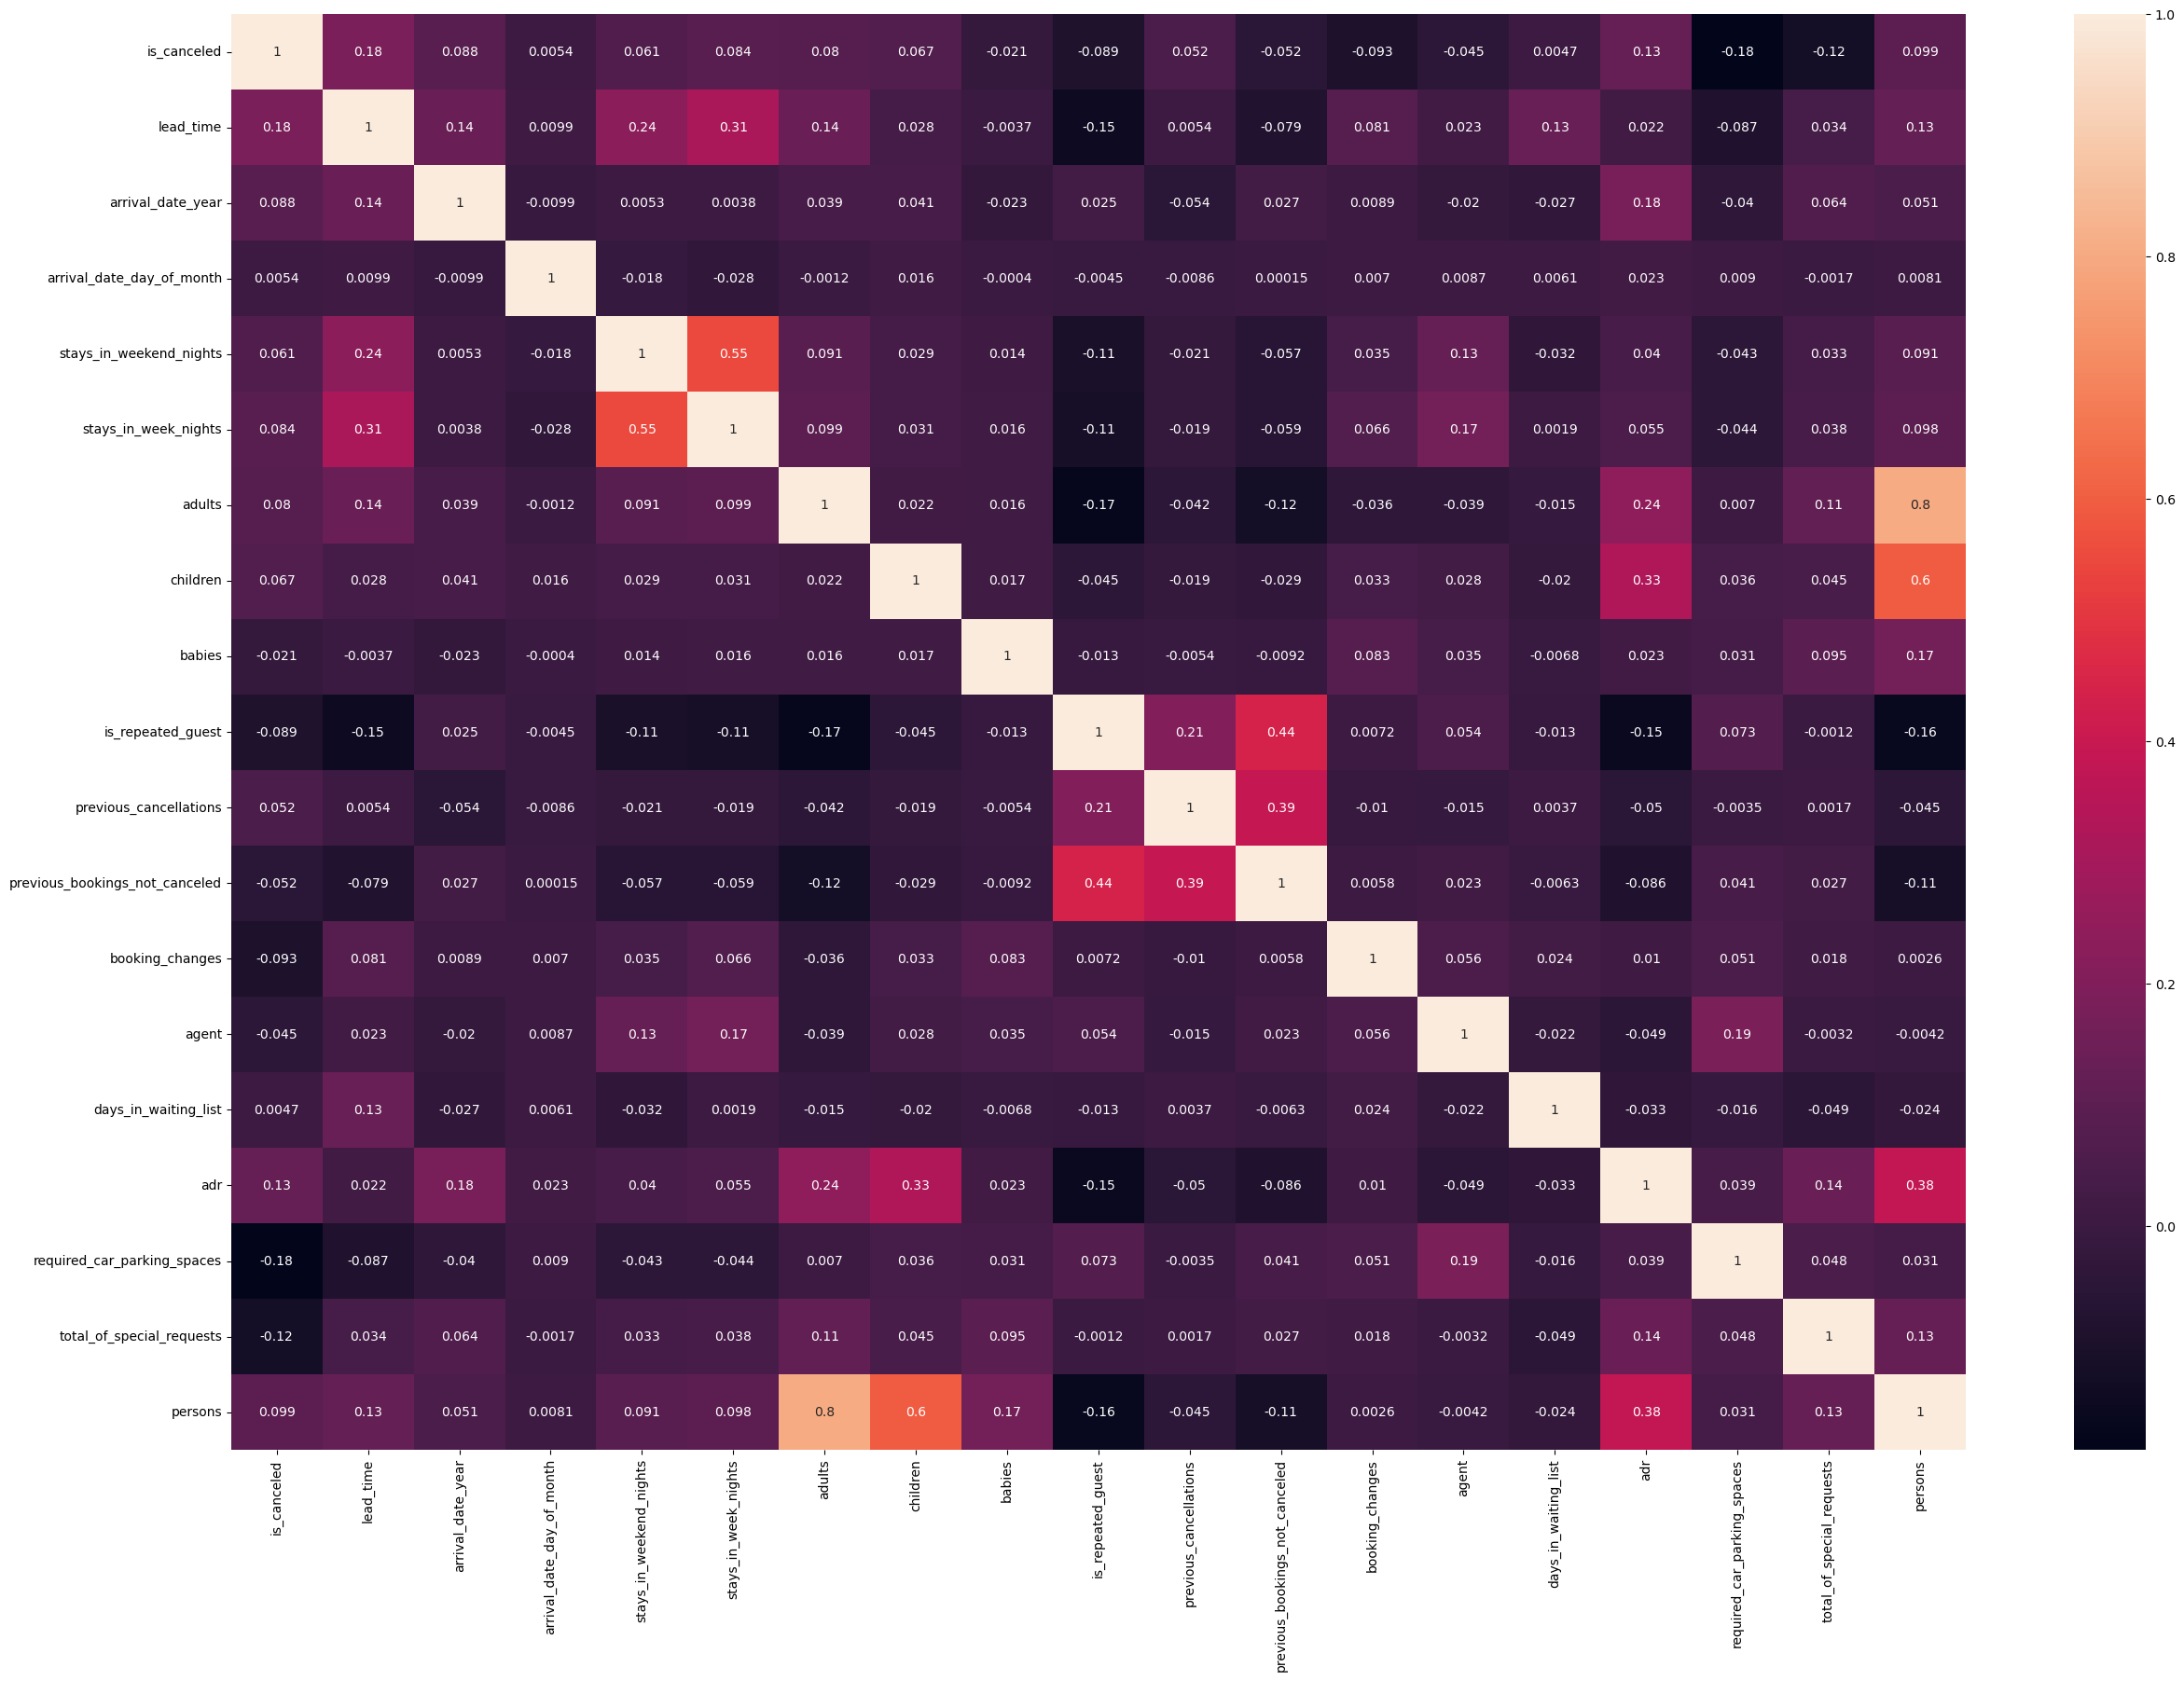

In [23]:
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot=True)
plt.show()

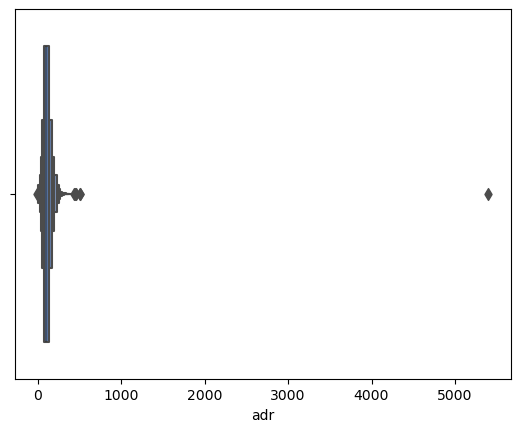

In [24]:
sns.boxenplot(data=df, x="adr")
plt.show()

In [25]:
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

filt = (df['adr'] < lower) | (df['adr'] > upper)
df.loc[filt, 'adr'] = np.nan

df['adr'] = df['adr'].fillna(df['adr'].mean())

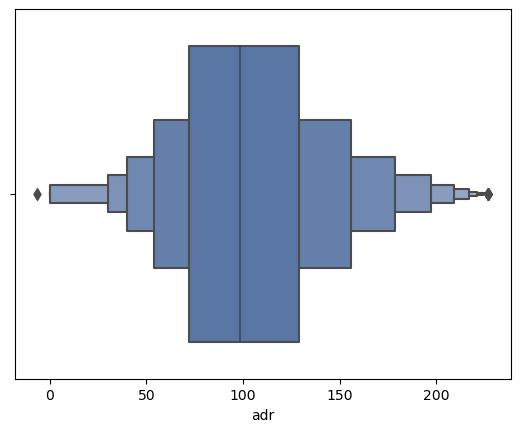

In [26]:
sns.boxenplot(data=df, x="adr")
plt.show()

### `hotel` column

In [27]:
df["hotel"].value_counts(normalize=True)

City Hotel      0.61073
Resort Hotel    0.38927
Name: hotel, dtype: float64

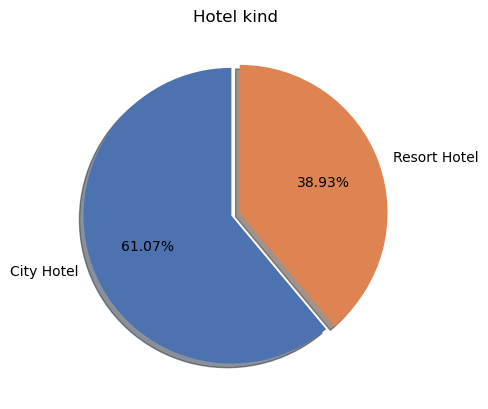

In [28]:
pie_plot("hotel", "Hotel kind")

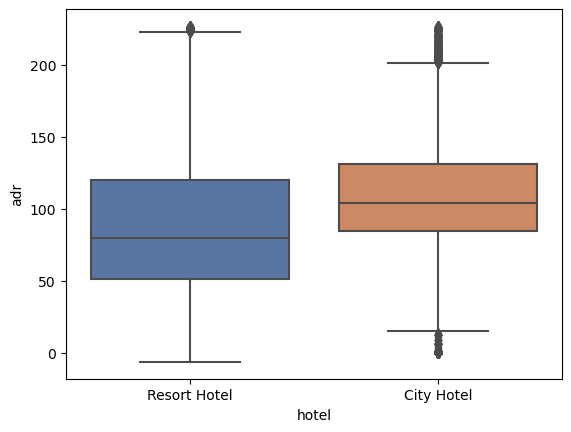

In [29]:
sns.boxplot(data=df, y='adr', x='hotel')
plt.show()

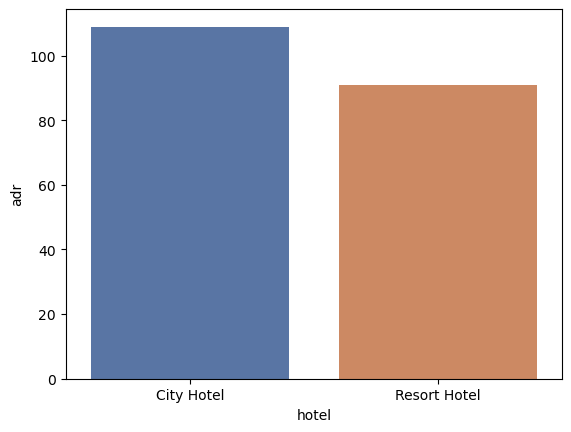

In [30]:
sns.barplot(data=df.groupby('hotel')['adr'].mean().reset_index(), y='adr', x='hotel')
plt.show()

> The ADR for city hotel is higher than Resort hotel

### `is_canceled` column

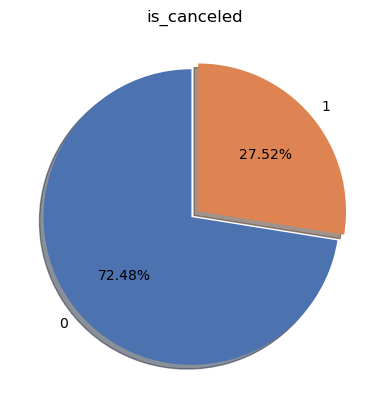

In [31]:
pie_plot("is_canceled", "is_canceled")

> More than a quarter of the bookings were canceled

In [32]:
df.groupby("hotel")["is_canceled"].value_counts()

hotel         is_canceled
City Hotel    0              37239
              1              16035
Resort Hotel  0              25982
              1               7974
Name: is_canceled, dtype: int64

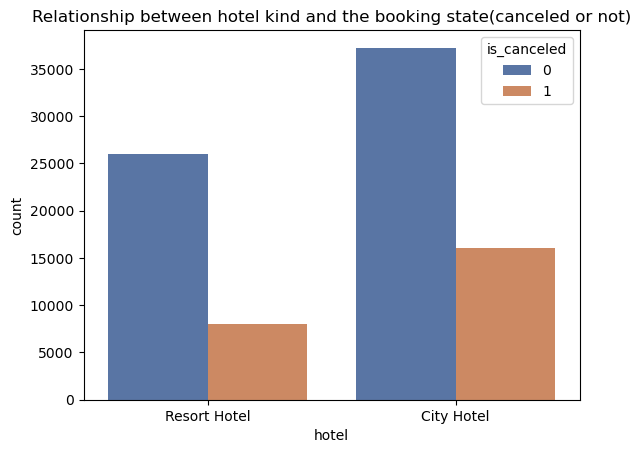

In [33]:
sns.countplot(data=df, x="hotel", hue="is_canceled")
plt.title("Relationship between hotel kind and the booking state(canceled or not)")
plt.show()

In [34]:
city_hotel = round(df.groupby("hotel")["is_canceled"].value_counts()["City Hotel"] / df["hotel"].value_counts()["City Hotel"], 4)*100

In [35]:
resort_hotel = round(df.groupby("hotel")["is_canceled"].value_counts()["Resort Hotel"] / df["hotel"].value_counts()["Resort Hotel"],4)*100

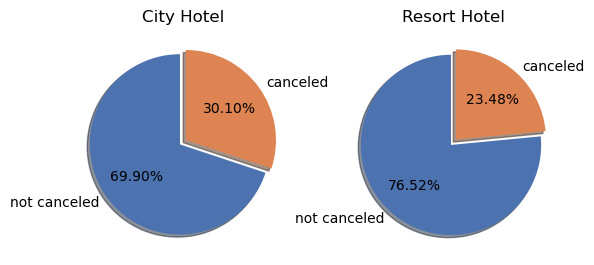

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.pie(city_hotel.values,
        labels=['not canceled','canceled'],
        autopct='%2.2f%%',
        startangle=90,
        explode=[.04]*2,
        shadow=True)
ax1.set_title("City Hotel")
ax2.pie(resort_hotel.values,
        labels=['not canceled','canceled'],
        autopct='%2.2f%%',
        startangle=90,
        explode=[.04]*2,
        shadow=True)
ax2.set_title("Resort Hotel")
plt.show()

> Canceled bookings ratio in `City Hotel` is more than `Resort Hotel`  

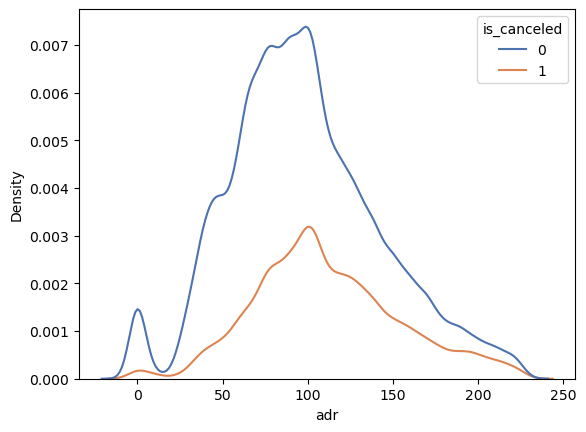

In [37]:
sns.kdeplot(data=df, x="adr", hue="is_canceled")
plt.show()

### `lead_time` column

In [38]:
df['lead_time'].describe()

count    87230.000000
mean        79.971019
std         86.058683
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        737.000000
Name: lead_time, dtype: float64

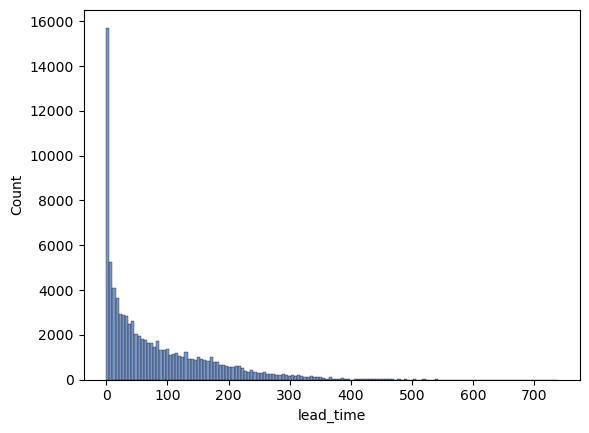

In [39]:
sns.histplot(data=df, x='lead_time')
plt.show()

In [40]:
df['is_canceled'] = df['is_canceled'].astype("category")

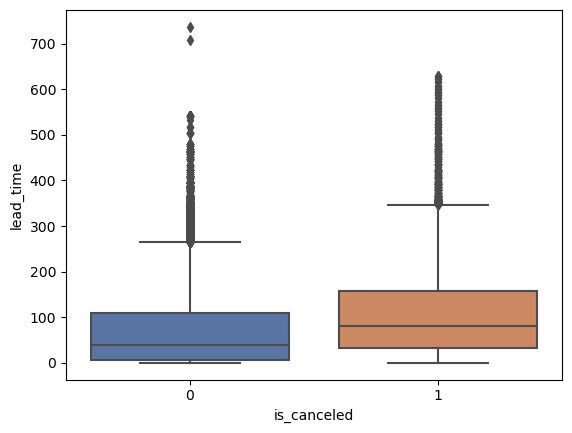

In [41]:
sns.boxplot(data=df, y='lead_time', x='is_canceled')
plt.show()

`arrival_date_year` `arrival_date_month` `arrival_date_day_of_month` can be replaced by one column

In [42]:
month_dict = dict((b, a) for a,b in enumerate(calendar.month_name))
df["arrival_date_month"] = df["arrival_date_month"].map(month_dict)

In [43]:
df = df.rename(columns={"arrival_date_year":"year", "arrival_date_month":"month", "arrival_date_day_of_month":"day"})

In [44]:
df["arrival_date"] = pd.to_datetime(df[["year", "month", "day"]])

In [45]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'year', 'month', 'day',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'persons',
       'arrival_date'],
      dtype='object')

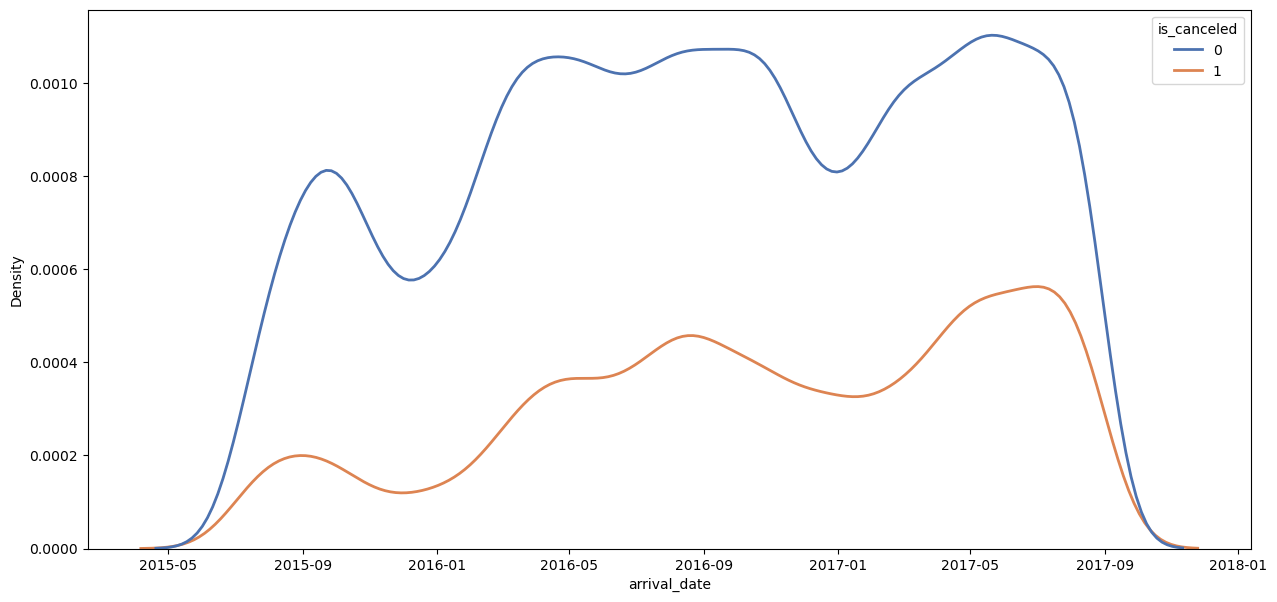

In [46]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.kdeplot(data=df, x="arrival_date", hue="is_canceled", linewidth=2)
plt.show()

> Bookings increases in summer months then decreases until January

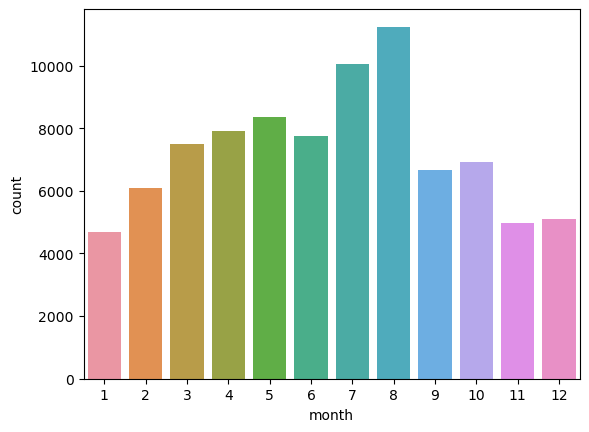

In [47]:
sns.countplot(data=df, x="month")
plt.show()

>July and August has the higths booking rates

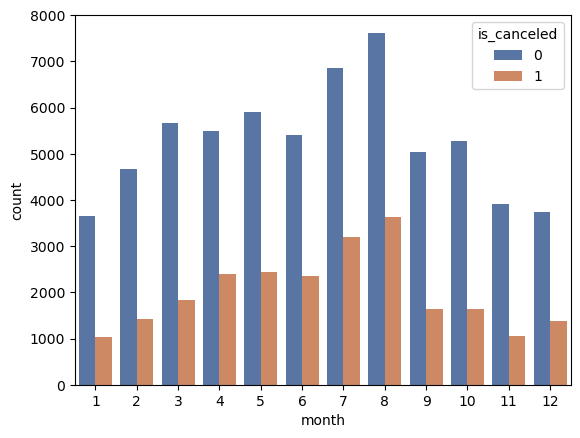

In [48]:
sns.countplot(data=df, x="month", hue="is_canceled")
plt.show()

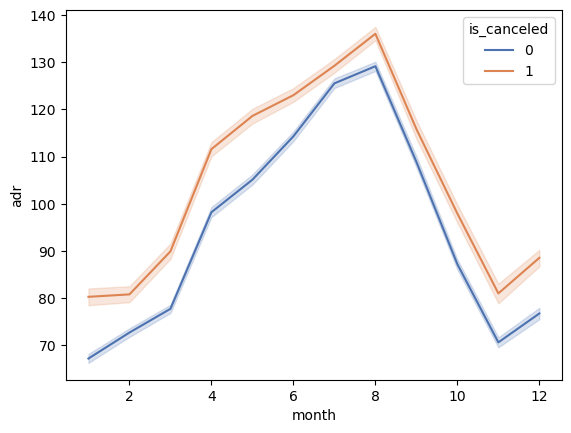

In [49]:
sns.lineplot(data=df, x='month', y='adr',hue="is_canceled")
plt.show()

> Canceled bookings has high ADR

### `stays_in_weekend_nights` `stays_in_week_nights`:

In [50]:
df["stays_in_weekend_nights"].value_counts()

0     35058
2     26376
1     22646
4      1726
3      1143
6       112
5        68
8        58
7        15
9         9
10        7
12        5
13        2
16        2
18        1
19        1
14        1
Name: stays_in_weekend_nights, dtype: int64

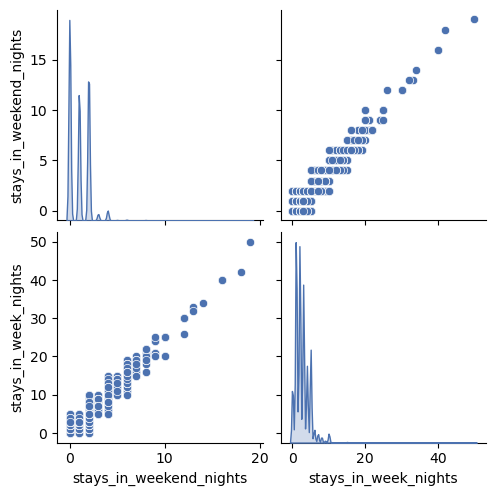

In [51]:
sns.pairplot(data=df, vars=["stays_in_weekend_nights", "stays_in_week_nights"], diag_kind="kde")
plt.show()

> stays_in_weekend_nights has a positive relationship with  stays_in_week_nights

we can calculate the number of nigths by summation these two columns

In [52]:
df["num_of_nigths"] = df[["stays_in_weekend_nights", "stays_in_week_nights"]].sum(axis=1)

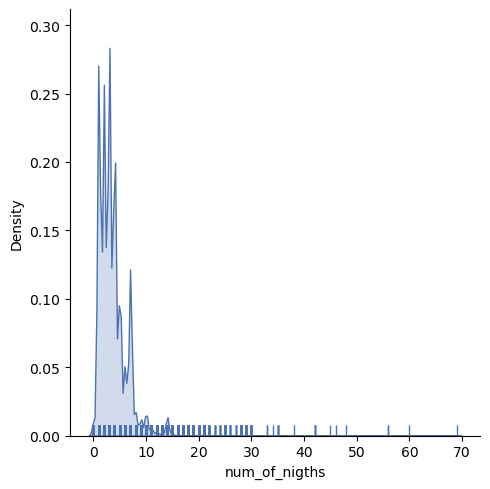

In [53]:
sns.displot(df["num_of_nigths"],kind="kde", rug=True, fill=True)

> Most of the people booked fewer than 20 nigths

### `adults` `children` `babies`

In [54]:
df["adults"].describe()

count    87230.000000
mean         1.879365
std          0.621724
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: adults, dtype: float64

<AxesSubplot:xlabel='is_canceled', ylabel='adults'>

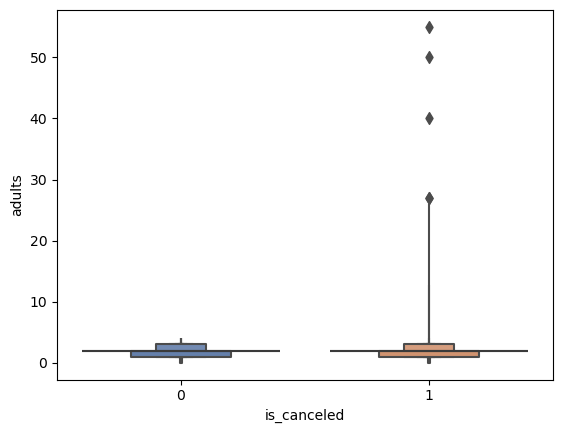

In [55]:
sns.boxenplot(data=df, y="adults", x="is_canceled")

<AxesSubplot:xlabel='is_canceled', ylabel='persons'>

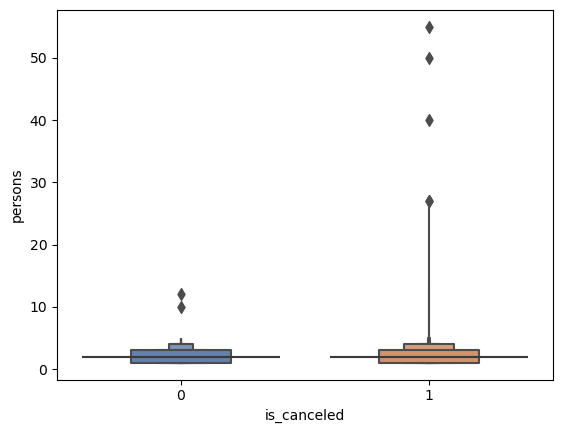

In [56]:
sns.boxenplot(y="persons", data=df, x="is_canceled")

> Bookings with too many people had been canceled

<AxesSubplot:xlabel='adr', ylabel='persons'>

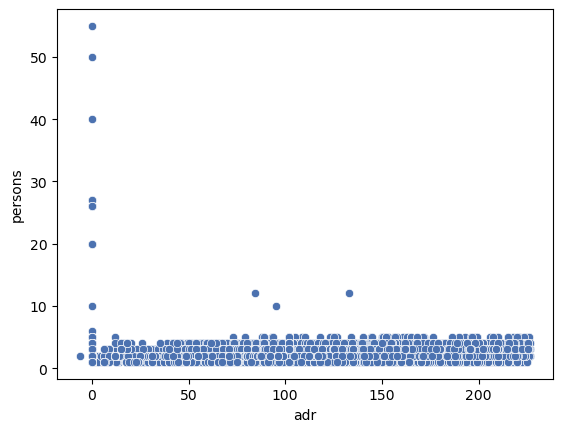

In [57]:
sns.scatterplot(data=df, x="adr", y="persons")

### `meal` column

In [58]:
meal_values = round(df["meal"].value_counts()/len(df)*100, 2)

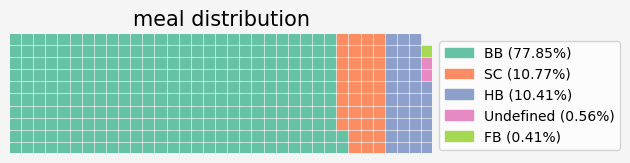

In [59]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=35,  
    values=meal_values,
    labels=["{0} ({1}%)".format(k, v) for k, v in meal_values.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    cmap_name = 'Set2',
    facecolor = 'whitesmoke',
    title = {"label": "meal distribution", "loc": "Center", "size": 15}, 
    icon_legend=True,
    vertical=False
)

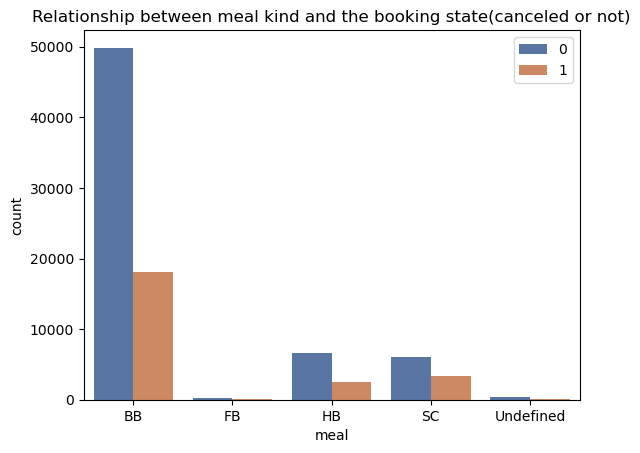

In [60]:
sns.countplot(data=df, x="meal", hue="is_canceled")
plt.legend(labels=[0, 1])
plt.title("Relationship between meal kind and the booking state(canceled or not)")
plt.show()

<AxesSubplot:xlabel='meal', ylabel='adr'>

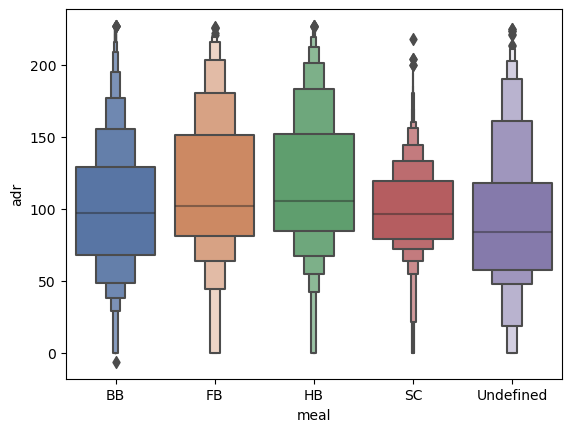

In [61]:
sns.boxenplot(y="adr", data=df, x="meal")

> BB is the most popular meal and it does not cost much

### `country` column

In [62]:
top_countries= df["country"].value_counts().head(10)

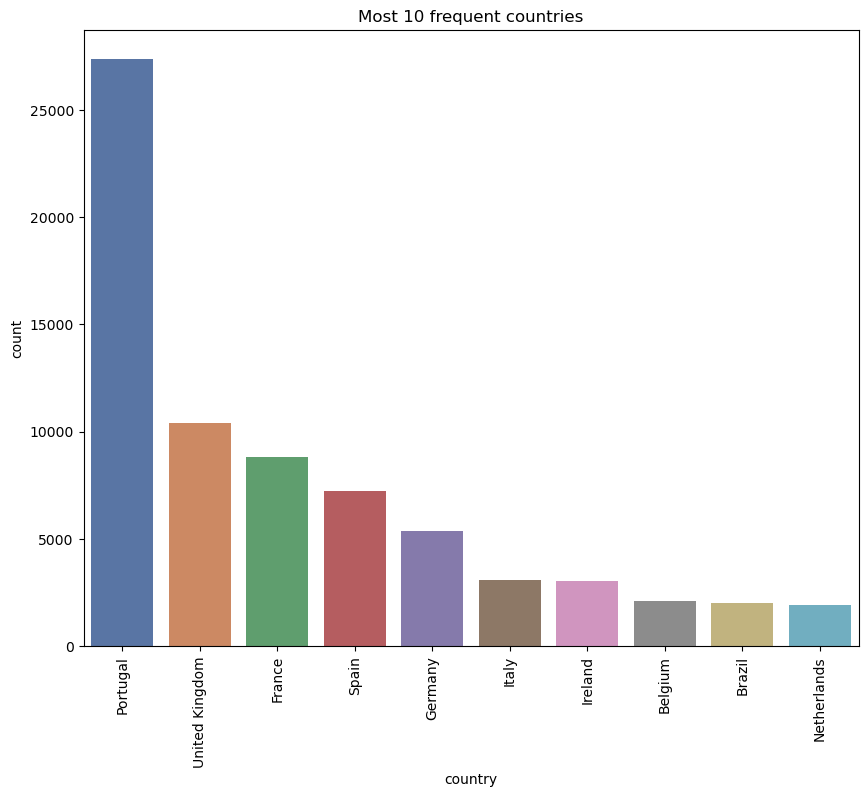

In [63]:
plt.figure(figsize=(10, 8))
top_countries= df["country"].value_counts().head(10)
g=sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xticks(rotation=90)
plt.title("Most 10 frequent countries")
g.set(xlabel="country", ylabel="count")
plt.show()

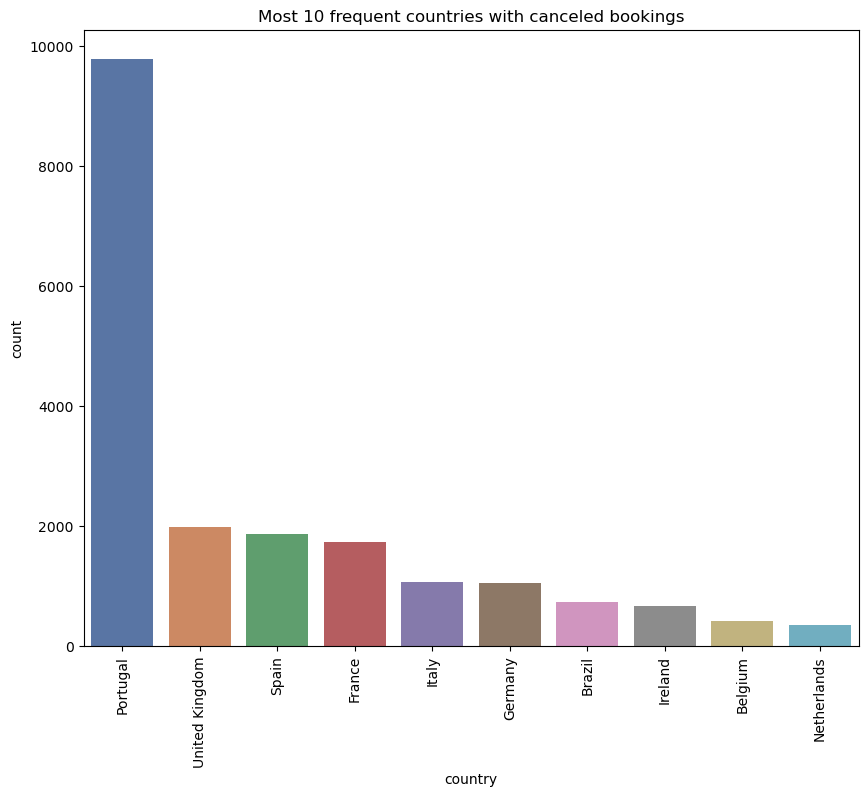

In [64]:
df["is_canceled"] = df["is_canceled"].astype("int")
top_countries = df["country"].value_counts().index[:10]
df_top_countries = df[df["country"].isin(top_countries)]
cancelations_per_country = df_top_countries.groupby("country")["is_canceled"].sum()
cancelations_per_country = cancelations_per_country.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
g=sns.barplot(x=cancelations_per_country.index, y=cancelations_per_country.values)
plt.xticks(rotation=90)
plt.title("Most 10 frequent countries with canceled bookings")
g.set(xlabel="country", ylabel="count")
plt.show()

### `market_segment` `distribution_channel` columns

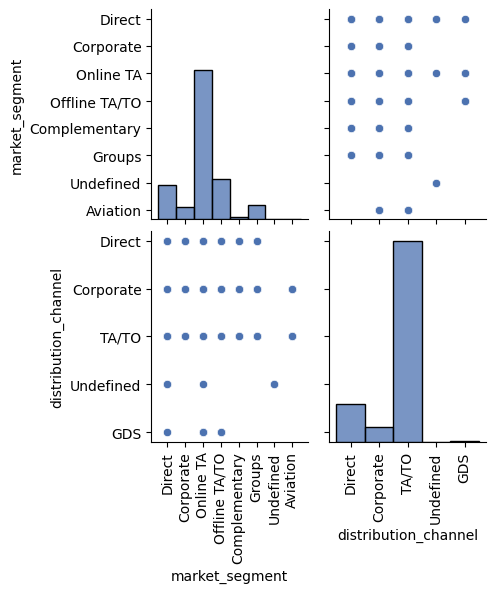

In [65]:
g = sns.pairplot(data=df, vars=["market_segment", "distribution_channel"])
for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

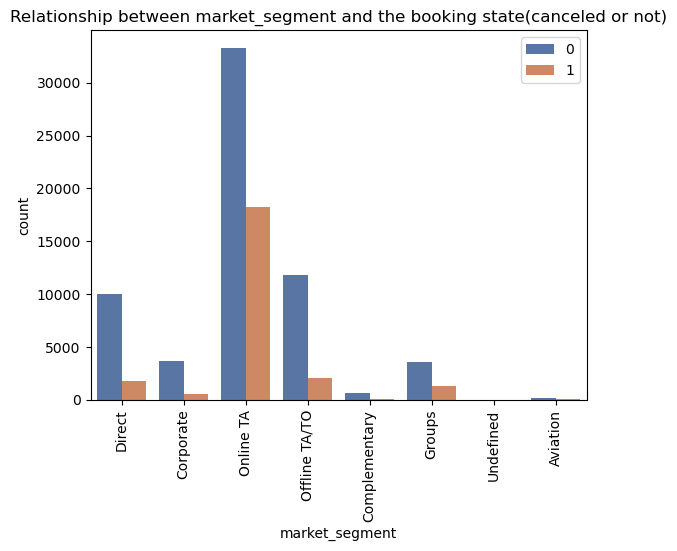

In [66]:
sns.countplot(data=df, x="market_segment", hue="is_canceled")
plt.legend(labels=[0, 1])
plt.title("Relationship between market_segment and the booking state(canceled or not)")
plt.xticks(rotation=90)
plt.show()

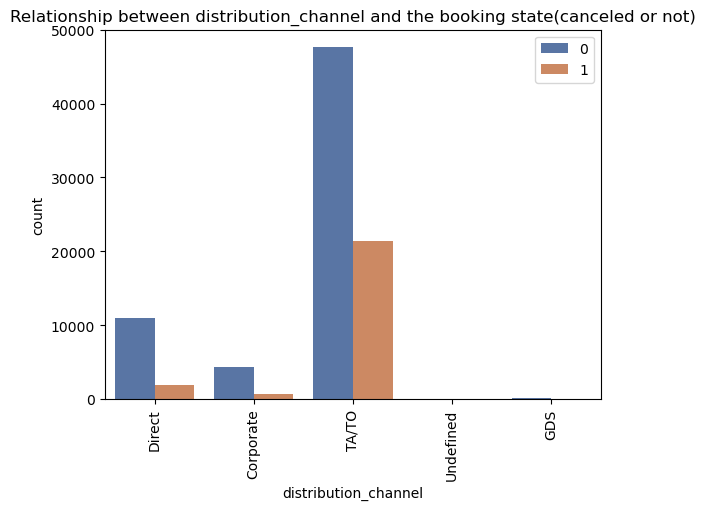

In [67]:
sns.countplot(data=df, x="distribution_channel", hue="is_canceled")
plt.legend(labels=[0, 1])
plt.title("Relationship between distribution_channel and the booking state(canceled or not)")
plt.xticks(rotation=90)
plt.show()

### `is_repeated_guest` `previous_cancellations` `previous_bookings_not_canceled` columns

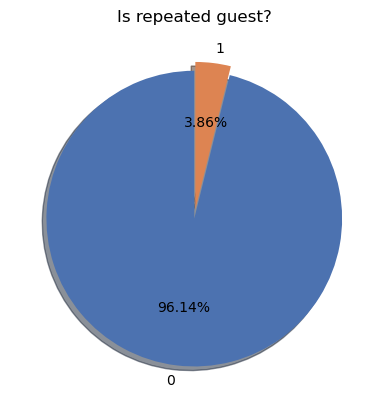

In [68]:
pie_plot("is_repeated_guest", "Is repeated guest?")

### `reserved_room_type` `assigned_room_type` columns

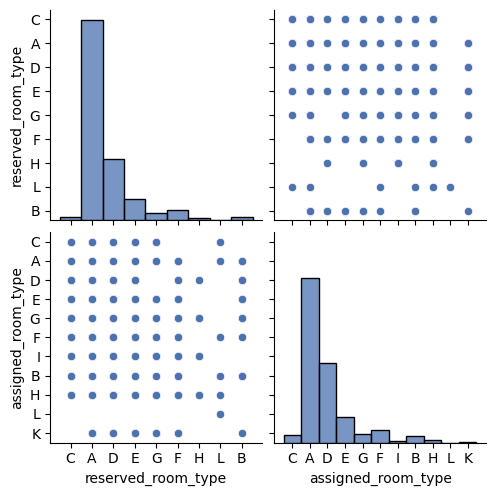

In [69]:
sns.pairplot(data=df, vars=["reserved_room_type", "assigned_room_type"])
plt.xticks(rotation=90)
plt.show()

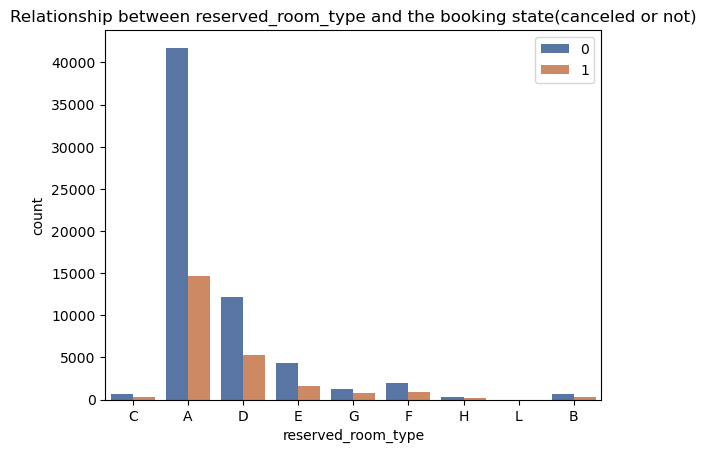

In [70]:
sns.countplot(data=df, x="reserved_room_type", hue="is_canceled")
plt.legend(labels=[0, 1])
plt.title("Relationship between reserved_room_type and the booking state(canceled or not)")
plt.show()

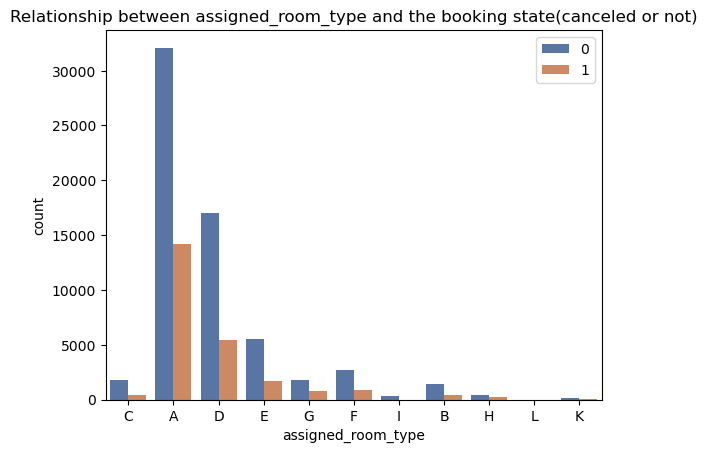

In [71]:
sns.countplot(data=df, x="assigned_room_type", hue="is_canceled")
plt.legend(labels=[0, 1])
plt.title("Relationship between assigned_room_type and the booking state(canceled or not)")
plt.show()

<AxesSubplot:xlabel='assigned_room_type', ylabel='adr'>

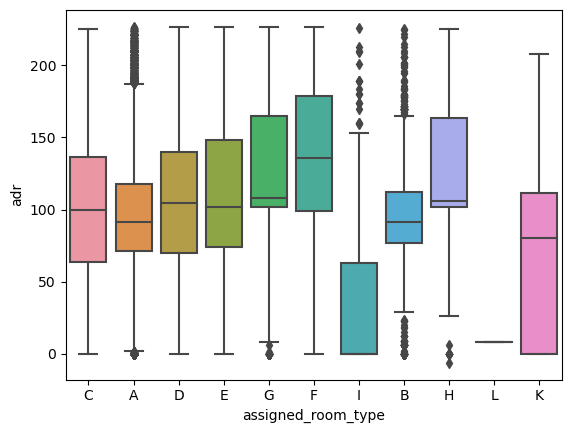

In [72]:
sns.boxplot(y="adr", data=df, x="assigned_room_type")

### `deposit_type` column

<AxesSubplot:xlabel='deposit_type', ylabel='count'>

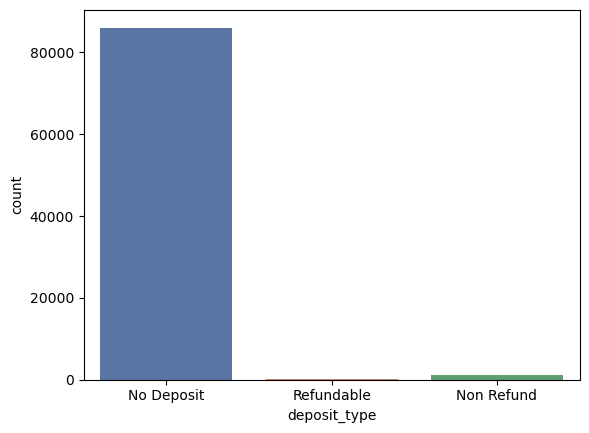

In [73]:
sns.countplot(data=df, x="deposit_type")

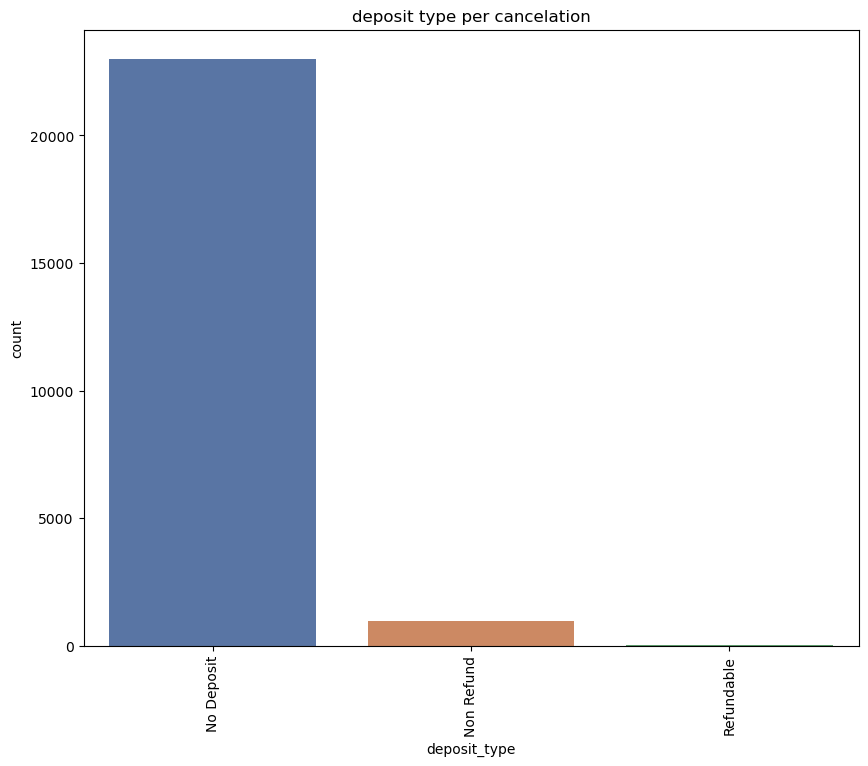

In [74]:
cancelations_per_deposit_type = df.groupby("deposit_type")["is_canceled"].sum()
cancelations_per_deposit_type = cancelations_per_deposit_type.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
g=sns.barplot(x=cancelations_per_deposit_type.index, y=cancelations_per_deposit_type.values)
plt.xticks(rotation=90)
plt.title("deposit type per cancelation")
g.set(xlabel="deposit_type", ylabel="count")
plt.show()

> Most peole canceled the booking did not pay a deposit

### `days_in_waiting_list` column

<AxesSubplot:xlabel='days_in_waiting_list', ylabel='Count'>

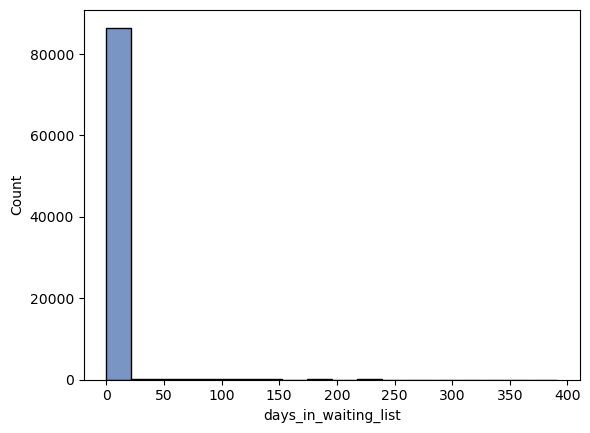

In [75]:
sns.histplot(df["days_in_waiting_list"])

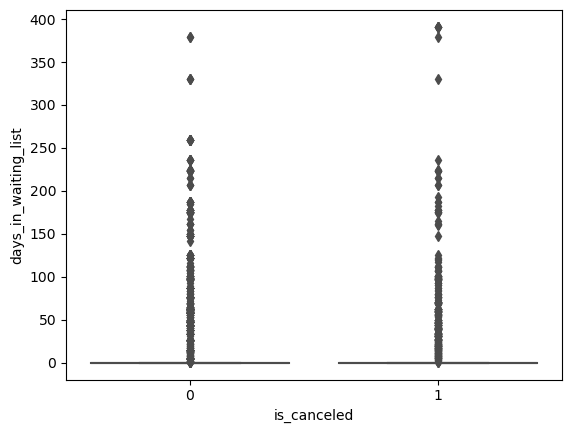

In [76]:
sns.boxplot(data=df, y='days_in_waiting_list', x='is_canceled')
plt.show()

### `customer_type` column

<AxesSubplot:xlabel='customer_type', ylabel='count'>

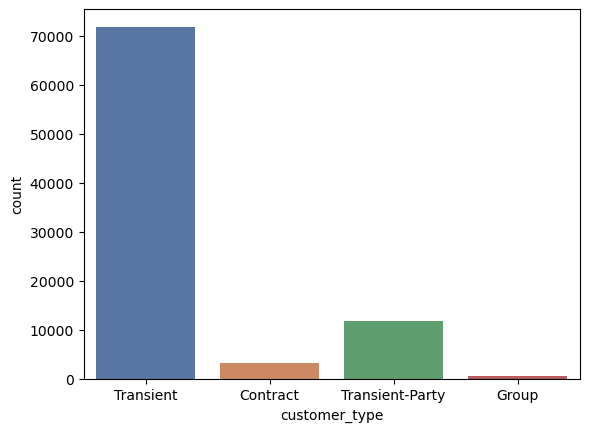

In [77]:
sns.countplot(data=df, x="customer_type")

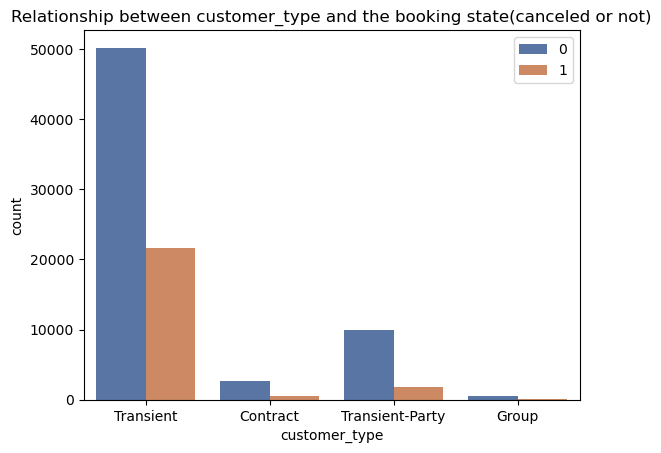

In [78]:
sns.countplot(data=df, x="customer_type", hue="is_canceled")
plt.legend(labels=[0, 1])
plt.title("Relationship between customer_type and the booking state(canceled or not)")
plt.show()